## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv", parse_dates= ["Effective To Date"])
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,NaN,Basic,Bachelor,2011-02-24,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,NaN,2011-01-31,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9127 non-null   object        
 1   State                          9130 non-null   object        
 2   Customer Lifetime Value        9130 non-null   float64       
 3   Response                       9130 non-null   object        
 4   Coverage                       9131 non-null   object        
 5   Education                      9126 non-null   object        
 6   Effective To Date              9131 non-null   datetime64[ns]
 7   EmploymentStatus               9125 non-null   object        
 8   Gender                         9132 non-null   object        
 9   Income                         9130 non-null   float64       
 10  Location Code                  9129 non-null   object        
 11  Marital Status   

In [5]:
df.shape

(9134, 24)

In [6]:
df.nunique()

Customer                         9127
State                               5
Customer Lifetime Value          8037
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    6
Gender                              2
Income                           5690
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5105
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9130.0,8006.718727,6871.913657,1898.007675,3995.711688,5782.095838,8965.431326,83325.381190
Income,9130.0,37652.099124,30382.484848,0.000000,0.000000,33881.500000,62320.000000,99981.000000
Monthly Premium Auto,9131.0,93.210820,34.397740,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9130.0,15.096714,10.073688,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9132.0,48.067346,27.906072,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9130.0,0.384228,0.910145,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9133.0,2.966167,2.390313,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9132.0,434.065529,290.522032,0.099007,272.211686,383.844115,547.304946,2893.239678


In [8]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024401,0.396139,0.012025,0.009206,-0.036245,0.021904,0.226529
Income,0.024401,1.000000,-0.016836,-0.026954,-0.001042,0.006567,-0.008635,-0.355404
Monthly Premium Auto,0.396139,-0.016836,1.000000,0.005092,0.020135,-0.013398,-0.011294,0.631939
Months Since Last Claim,0.012025,-0.026954,0.005092,1.000000,-0.043113,0.005959,0.009215,0.007695
Months Since Policy Inception,0.009206,-0.001042,0.020135,-0.043113,1.000000,-0.001529,-0.013474,0.003172
Number of Open Complaints,-0.036245,0.006567,-0.013398,0.005959,-0.001529,1.000000,0.001799,-0.014476
Number of Policies,0.021904,-0.008635,-0.011294,0.009215,-0.013474,0.001799,1.000000,-0.002287
Total Claim Amount,0.226529,-0.355404,0.631939,0.007695,0.003172,-0.014476,-0.002287,1.000000


## Missing Data Analysis

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum()

Customer                         7
State                            4
Customer Lifetime Value          4
Response                         4
Coverage                         3
Education                        8
Effective To Date                3
EmploymentStatus                 9
Gender                           2
Income                           4
Location Code                    5
Marital Status                   5
Monthly Premium Auto             3
Months Since Last Claim          4
Months Since Policy Inception    2
Number of Open Complaints        4
Number of Policies               1
Policy Type                      3
Policy                           9
Renew Offer Type                 2
Sales Channel                    4
Total Claim Amount               2
Vehicle Class                    2
Vehicle Size                     6
dtype: int64

In [11]:
df.isnull().sum().sum()

100

In [12]:
index = 0
for i in df.columns:
    print(index)
    index = index + 1
    print(type(df[i][0]))

0
<class 'str'>
1
<class 'str'>
2
<class 'numpy.float64'>
3
<class 'float'>
4
<class 'str'>
5
<class 'str'>
6
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
7
<class 'str'>
8
<class 'str'>
9
<class 'numpy.float64'>
10
<class 'str'>
11
<class 'str'>
12
<class 'numpy.float64'>
13
<class 'numpy.float64'>
14
<class 'numpy.float64'>
15
<class 'numpy.float64'>
16
<class 'numpy.float64'>
17
<class 'str'>
18
<class 'str'>
19
<class 'str'>
20
<class 'str'>
21
<class 'numpy.float64'>
22
<class 'str'>
23
<class 'str'>


In [5]:
str_data = []
float_data = []

for i in df.columns:
    if type(df[i][0]) == np.float64:
        float_data.append(df[i])
    else:
        str_data.append(df[i])
        
## Buda yaptığımız işlem her bir sütundaki birinci verilerin türüne göre (float, str) ayırmak. Sonra ilgili ayırma işleminden sonra boş verileri türlerine göre dolduracağız.

In [6]:
str_data = pd.DataFrame(str_data).T
float_data = pd.DataFrame(float_data).T

In [7]:
str_data.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,NaN,Basic,Bachelor,1298505600000000000,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,NaN,1296432000000000000,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,1298073600000000000,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1295481600000000000,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,1296691200000000000,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [8]:
str_data.drop(["Effective To Date"], axis = 1, inplace= True)
str_data.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,NaN,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,NaN,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
from sklearn.impute import SimpleImputer
smi = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data1 = smi.fit_transform(str_data)

In [10]:
type(data1)

numpy.ndarray

In [11]:
new_data_str = pd.DataFrame(data1, columns= str_data.columns)

In [12]:
new_data_str.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
new_data_str.isnull().sum()

Customer            0
State               0
Response            0
Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location Code       0
Marital Status      0
Policy Type         0
Policy              0
Renew Offer Type    0
Sales Channel       0
Vehicle Class       0
Vehicle Size        0
dtype: int64

In [14]:
str_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer          9127 non-null   object
 1   State             9130 non-null   object
 2   Response          9130 non-null   object
 3   Coverage          9131 non-null   object
 4   Education         9126 non-null   object
 5   EmploymentStatus  9125 non-null   object
 6   Gender            9132 non-null   object
 7   Location Code     9129 non-null   object
 8   Marital Status    9129 non-null   object
 9   Policy Type       9131 non-null   object
 10  Policy            9125 non-null   object
 11  Renew Offer Type  9132 non-null   object
 12  Sales Channel     9130 non-null   object
 13  Vehicle Class     9132 non-null   object
 14  Vehicle Size      9128 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [15]:
smi = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = smi.fit_transform(float_data)

In [16]:
type(data2)

numpy.ndarray

In [17]:
new_float_data = pd.DataFrame(data2, columns= float_data.columns)

In [18]:
new_float_data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879


In [19]:
new_float_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   float64
 2   Monthly Premium Auto           9134 non-null   float64
 3   Months Since Last Claim        9134 non-null   float64
 4   Months Since Policy Inception  9134 non-null   float64
 5   Number of Open Complaints      9134 non-null   float64
 6   Number of Policies             9134 non-null   float64
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(8)
memory usage: 571.0 KB


In [20]:
new_float_data.isnull().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [21]:
data = pd.concat([new_float_data,new_data_str], axis = 1)

In [22]:
data.shape

(9134, 23)

In [23]:
data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer,State,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,BU79786,Washington,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,QZ44356,Arizona,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,AI49188,Nevada,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,WW63253,California,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,HB64268,Washington,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024391,0.396053,0.012016,0.009206,-0.036230,0.021893,0.226463
Income,0.024391,1.000000,-0.016819,-0.026943,-0.001042,0.006567,-0.008631,-0.355222
Monthly Premium Auto,0.396053,-0.016819,1.000000,0.005091,0.020133,-0.013396,-0.011292,0.631833
Months Since Last Claim,0.012016,-0.026943,0.005091,1.000000,-0.043097,0.005956,0.009214,0.007693
Months Since Policy Inception,0.009206,-0.001042,0.020133,-0.043097,1.000000,-0.001529,-0.013472,0.003171
Number of Open Complaints,-0.036230,0.006567,-0.013396,0.005956,-0.001529,1.000000,0.001799,-0.014474
Number of Policies,0.021893,-0.008631,-0.011292,0.009214,-0.013472,0.001799,1.000000,-0.002287
Total Claim Amount,0.226463,-0.355222,0.631833,0.007693,0.003171,-0.014474,-0.002287,1.000000


In [25]:
data.isnull().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location Code                    0
Marital Status                   0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   float64
 2   Monthly Premium Auto           9134 non-null   float64
 3   Months Since Last Claim        9134 non-null   float64
 4   Months Since Policy Inception  9134 non-null   float64
 5   Number of Open Complaints      9134 non-null   float64
 6   Number of Policies             9134 non-null   float64
 7   Total Claim Amount             9134 non-null   float64
 8   Customer                       9134 non-null   object 
 9   State                          9134 non-null   object 
 10  Response                       9134 non-null   object 
 11  Coverage                       9134 non-null   object 
 12  Education                      9134 non-null   o

## Dealing with Discrete Data

C:\Users\OHyP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

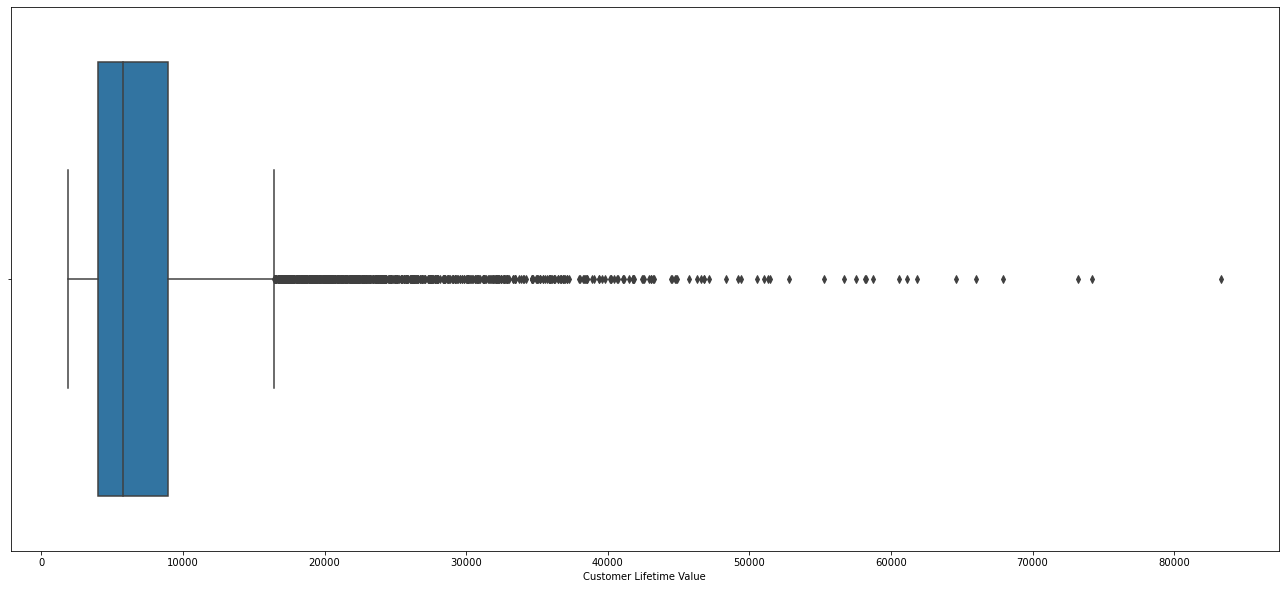

In [26]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
sns.boxplot(data["Customer Lifetime Value"])

In [19]:
# (IQR)
Q1 = df['Customer Lifetime Value'].quantile(0.25)
Q3 = df['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1
lower_data = Q3 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(f'Iqr value = {IQR}')
print()
print(f'Lower limit value is {lower_data}')
print()
print(f'Upper limit value is {upper}.')
print()

# Outliers
out = df[(df['Customer Lifetime Value'] > (Q3 + 1.5 * IQR))]['Customer Lifetime Value'].count()
print(f'{out} has upper residual value')
print()
lower = df[(df['Customer Lifetime Value'] < (Q1 - 1.5 * IQR))]['Customer Lifetime Value'].count()
print(f'There are {lower} sub residual values')

## Where are outliers in the data?
print()
print("Where are outliers in the data?")
aykiri = (data['Customer Lifetime Value'] > upper) | (data['Customer Lifetime Value'] < lower_data)
CLV = data['Customer Lifetime Value']
print("index   value")
CLV[aykiri]

Iqr value = 4969.719638999998

Lower limit value is 1510.8518680000016

Upper limit value is 16420.010784999995.

816 has upper residual value

There are 0 sub residual values

Where are outliers in the data?
index   value


8       24127.50402
22      24127.50402
31      18975.45611
50      36707.42639
51      33473.34946
           ...     
9097    30104.51969
9110    34611.37896
9122    25464.82059
9125    19872.26200
9129    23405.98798
Name: Customer Lifetime Value, Length: 816, dtype: float64

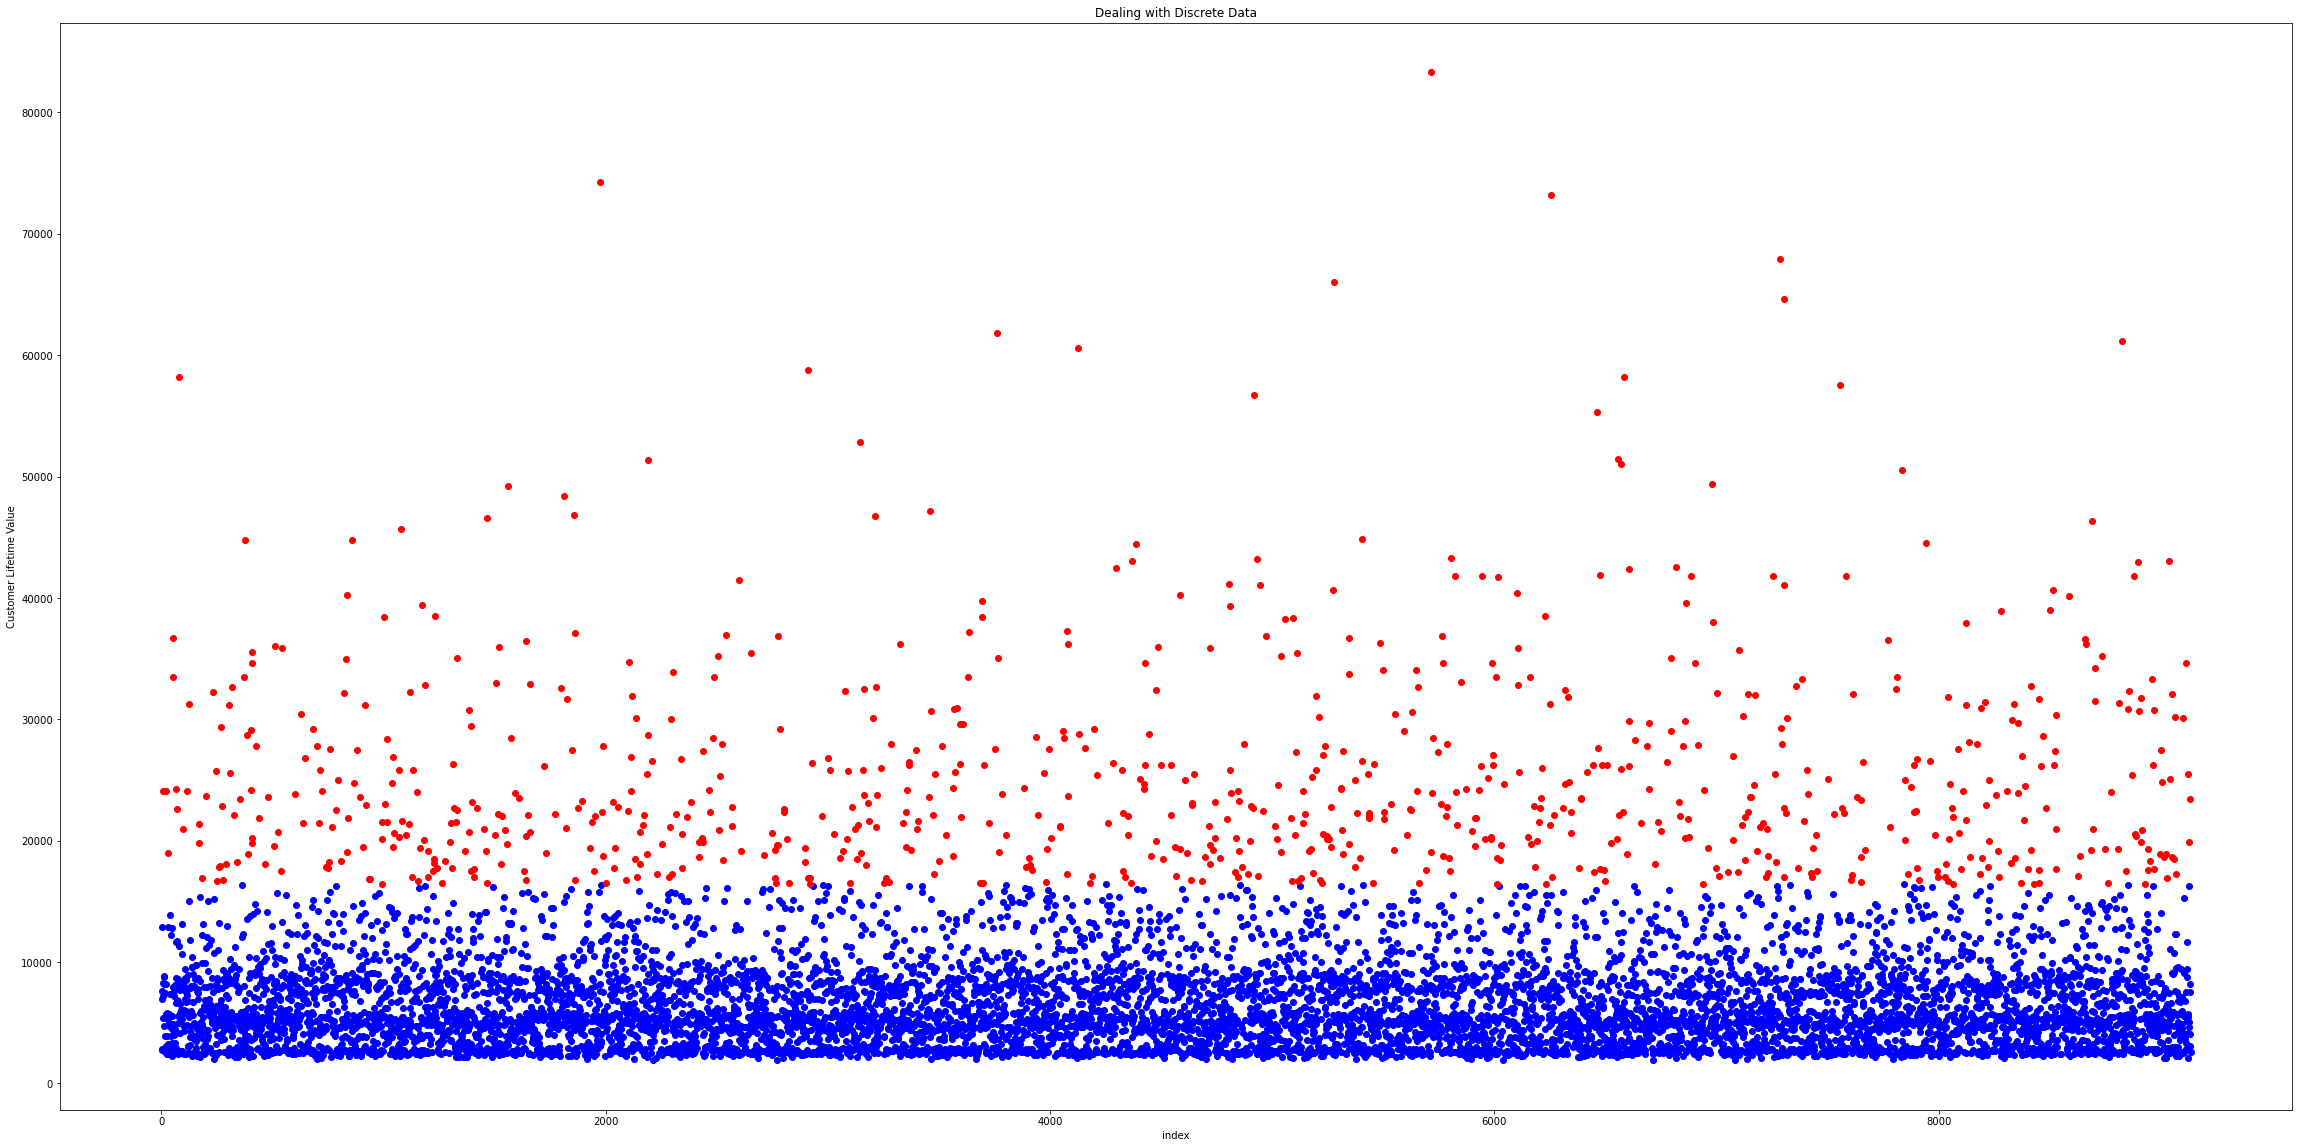

In [29]:
data_new = []
outlier = []
data_index = []
outlier_index = []
index = 0
for i in df["Customer Lifetime Value"]:
    index = index + 1
    if i < 16420.010784999995 and i > 1510.8518680000016:
        data_new.append(i)
        data_index.append(index)
    else:
        outlier.append(i)
        outlier_index.append(index)
        
plt.figure(figsize=(40,20))
plt.scatter(data_index,data_new,color = 'b')
plt.scatter(outlier_index,outlier,color = 'r')
plt.xlabel("index")
plt.ylabel("Customer Lifetime Value")
plt.title("Dealing with Discrete Data")
plt.show()

In [21]:
data["Customer Lifetime Value"] = data["Customer Lifetime Value"][~((data["Customer Lifetime Value"] < (lower_data)) | (data["Customer Lifetime Value"] > upper))]
##data.dropna(inplace = True)
##data.isnull().sum()

In [22]:
data["Customer Lifetime Value"] = data["Customer Lifetime Value"].fillna(data["Customer Lifetime Value"].mean())
##data.dropna(inplace = True)
##data.isnull().sum()

In [23]:
data["Customer Lifetime Value"].isnull().sum()

0

C:\Users\OHyP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

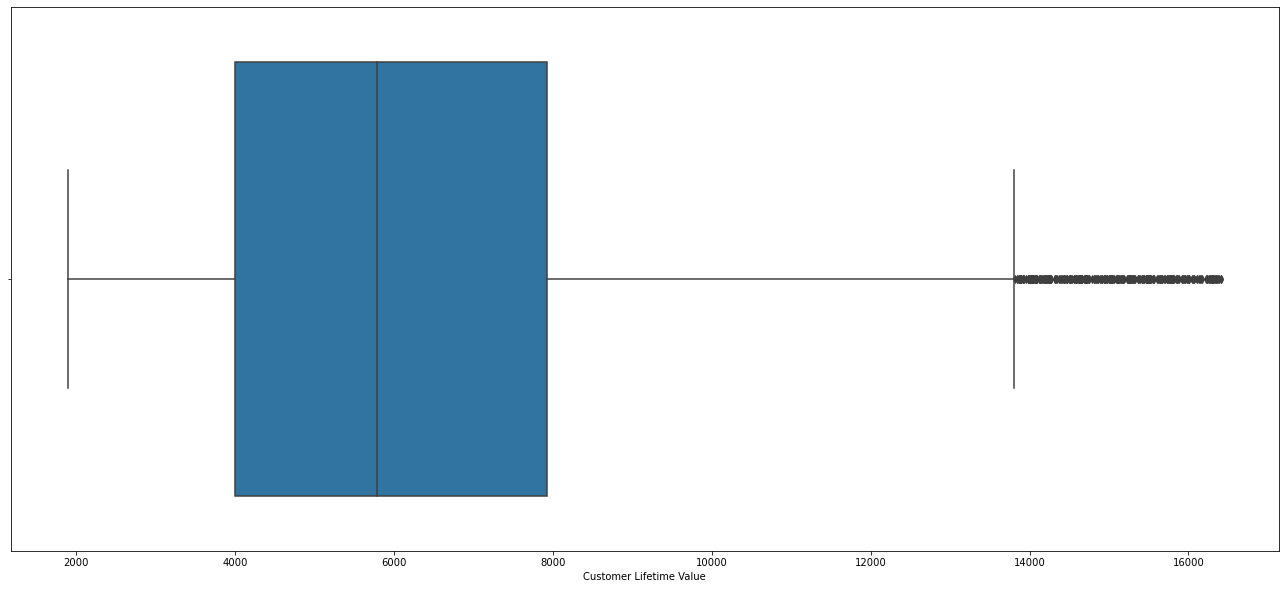

In [24]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
sns.boxplot(data["Customer Lifetime Value"])

## Plot

C:\Users\OHyP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

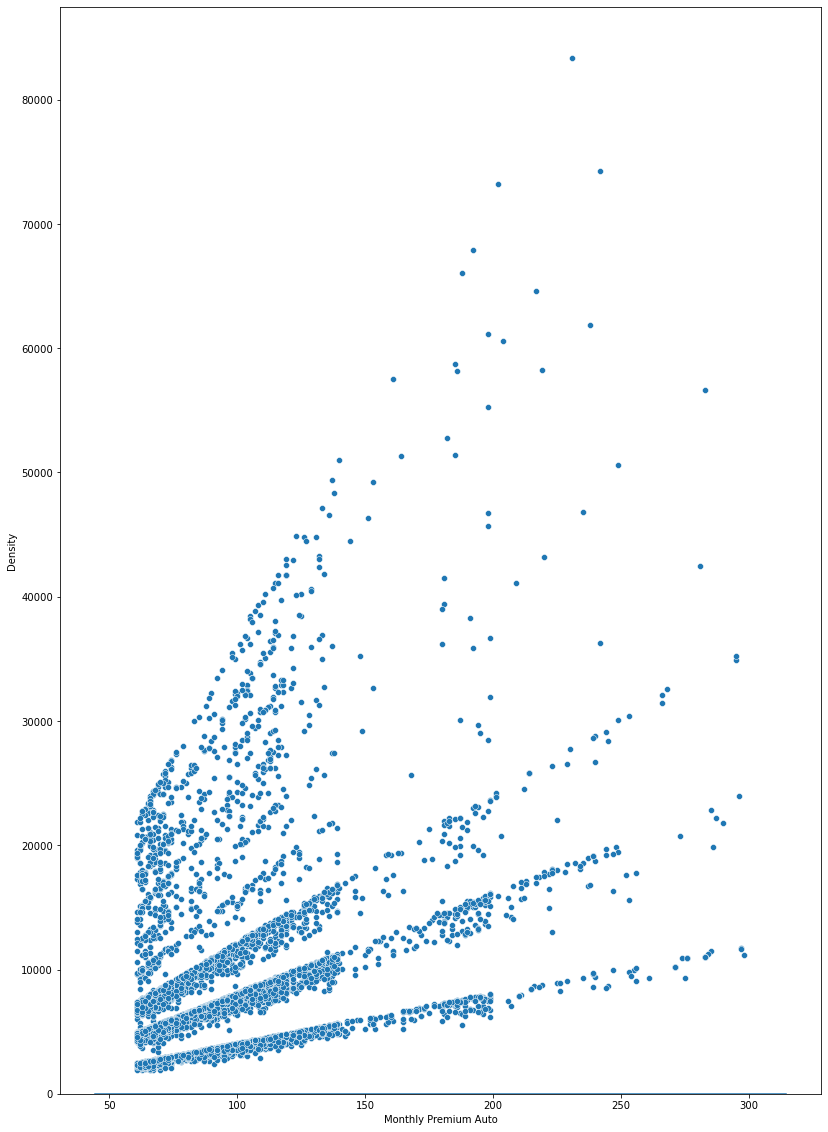

In [25]:
plt.figure(figsize=(30,20))
plt.subplot(1, 2, 1)
sns.distplot(df['Monthly Premium Auto'])
sns.scatterplot(x='Monthly Premium Auto', y='Customer Lifetime Value', data=df)

C:\Users\OHyP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

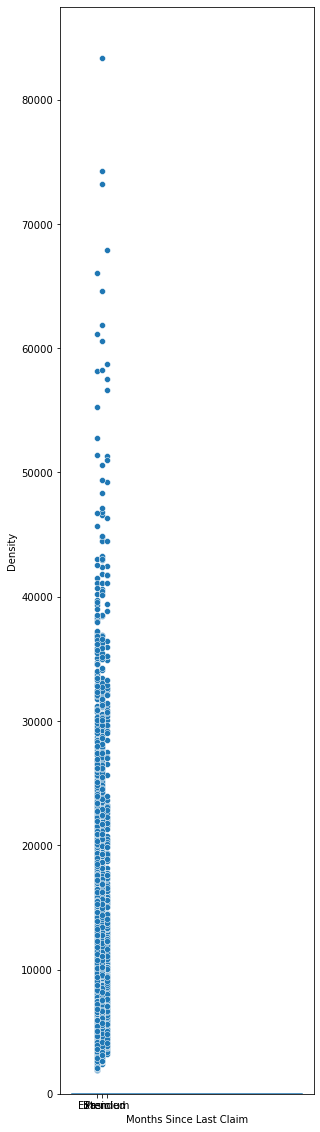

In [43]:
plt.figure(figsize=(10,20))
plt.subplot(1, 2, 1)
sns.distplot(df['Months Since Last Claim'])
sns.scatterplot(x='Coverage', y='Customer Lifetime Value', data=df)

C:\Users\OHyP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months Since Last Claim', ylabel='Density'>

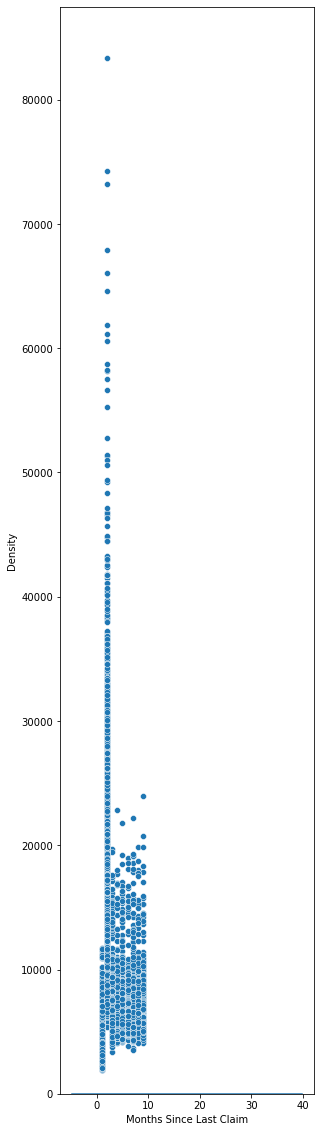

In [44]:
plt.figure(figsize=(10,20))
plt.subplot(1, 2, 1)
sns.distplot(df['Months Since Last Claim'])
sns.scatterplot(x='Number of Policies', y='Customer Lifetime Value', data=df)

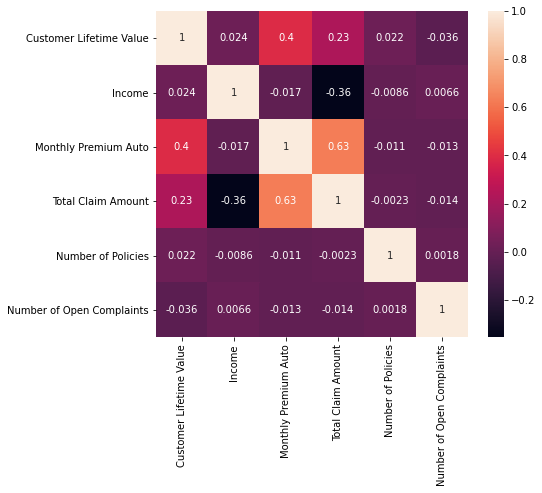

In [45]:
plt.figure(figsize=(7,6))
sns.heatmap(df[['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount','Number of Policies','Number of Open Complaints']].corr(),annot = True)
plt.show()

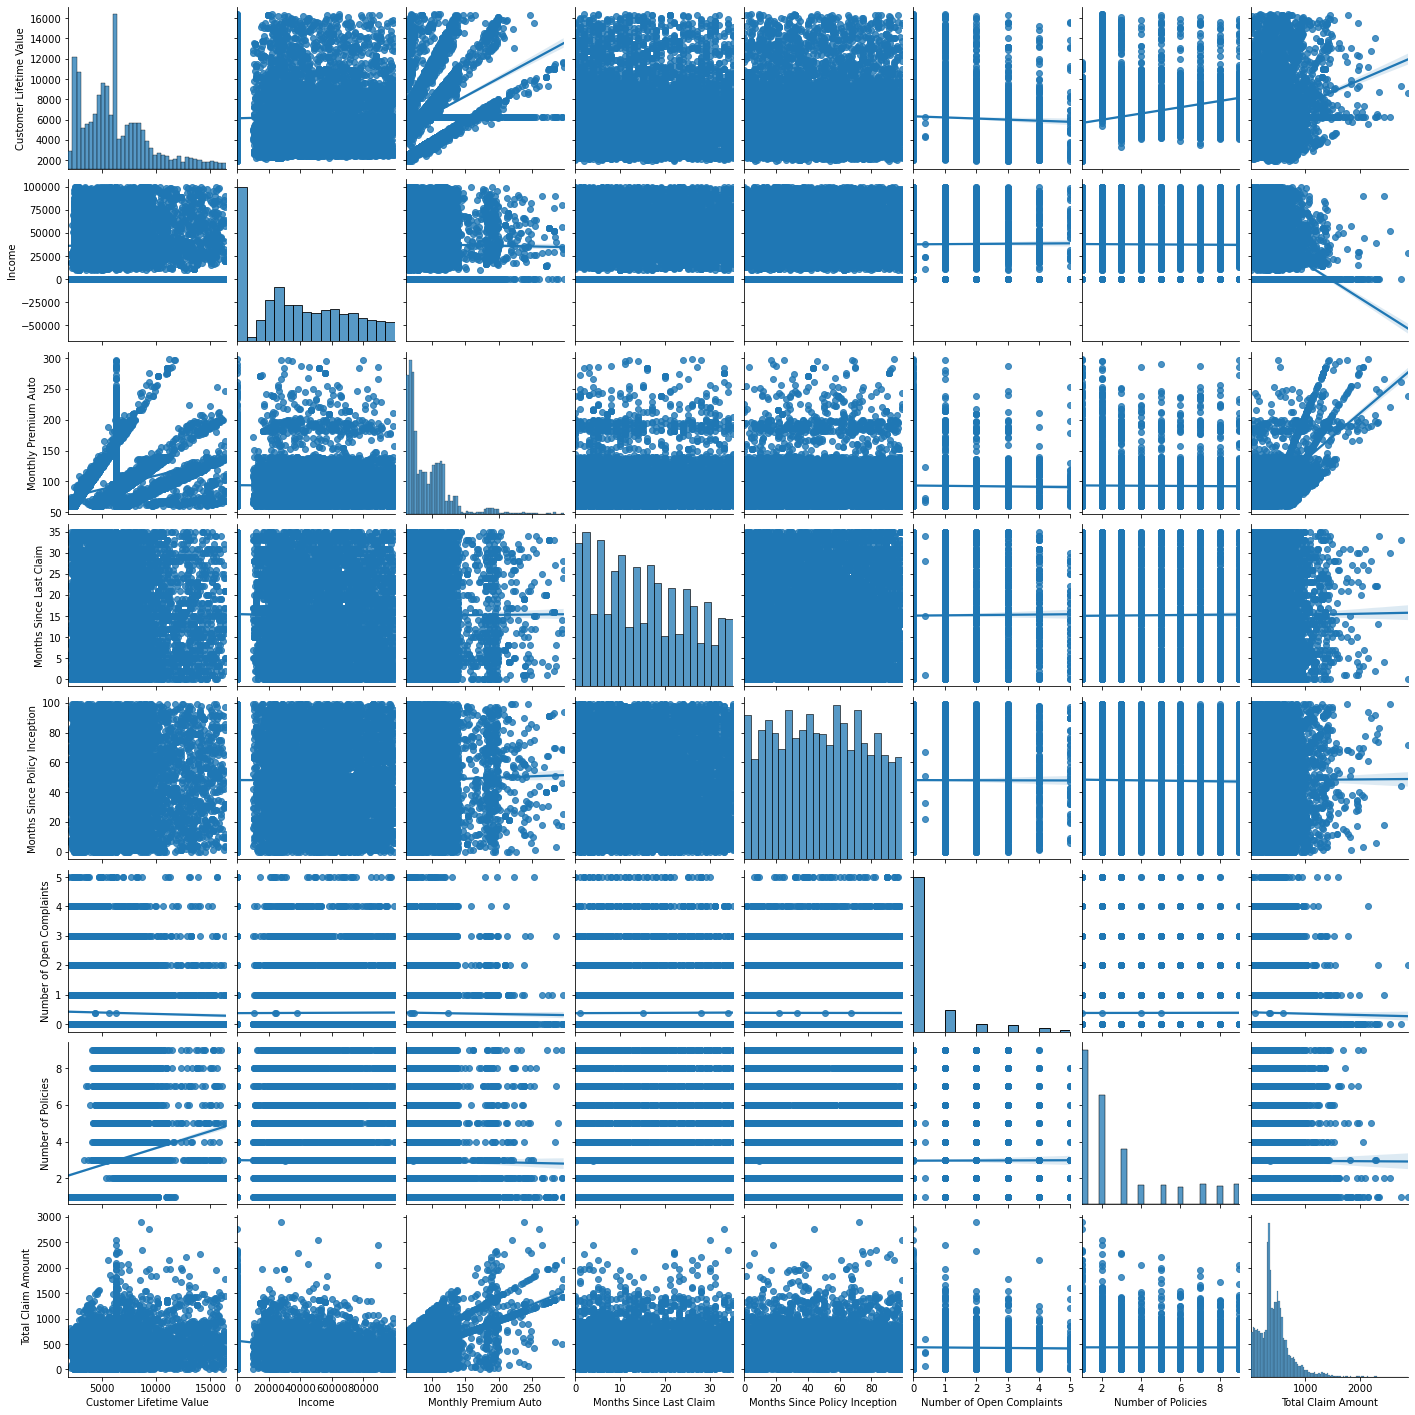

In [46]:
sns.pairplot(data, kind = "reg")

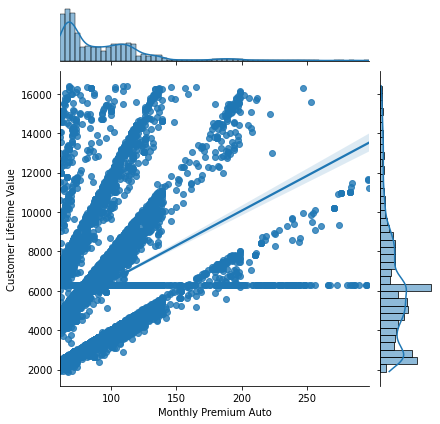

In [47]:
sns.jointplot(x = "Monthly Premium Auto", y = "Customer Lifetime Value", data = data, kind = "reg")

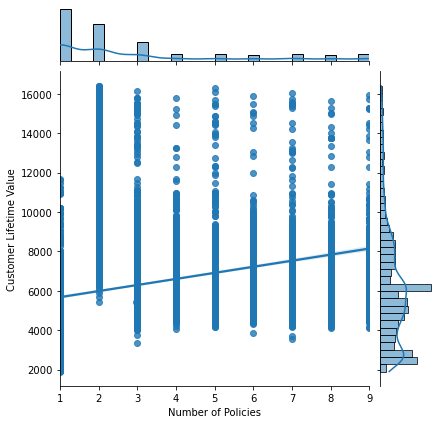

In [48]:
sns.jointplot(x = "Number of Policies", y = "Customer Lifetime Value", data = data, kind = "reg")

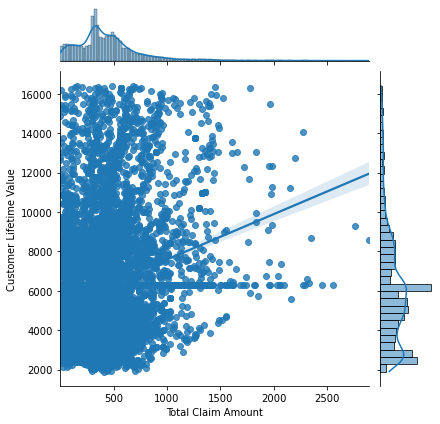

In [49]:
sns.jointplot(x = "Total Claim Amount", y = "Customer Lifetime Value", data = data, kind = "reg")

## Label Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
data["Customer"] = le.fit_transform(data["Customer"]).astype("float64")

In [29]:
data["State"] = le.fit_transform(data["State"]).astype("float64")

In [30]:
data["Coverage"] = le.fit_transform(data["Coverage"]).astype("float64")

In [31]:
data["Education"] = le.fit_transform(data["Education"]).astype("float64")

In [32]:
data["EmploymentStatus"] = le.fit_transform(data["EmploymentStatus"]).astype("float64")

In [33]:
data["Gender"] = le.fit_transform(data["Gender"]).astype("float64")

In [34]:
data["Location Code"] = le.fit_transform(data["Location Code"]).astype("float64")

In [35]:
data["Policy Type"] = le.fit_transform(data["Policy Type"]).astype("float64")

In [36]:
data["Renew Offer Type"] = le.fit_transform(data["Renew Offer Type"]).astype("float64")

In [37]:
data["Sales Channel"] = le.fit_transform(data["Sales Channel"]).astype("float64")

In [38]:
data["Vehicle Class"] = le.fit_transform(data["Vehicle Class"]).astype("float64")

In [39]:
data["Vehicle Size"] = le.fit_transform(data["Vehicle Size"]).astype("float64")

In [40]:
data["Response"] = le.fit_transform(data["Response"]).astype("float64")

In [41]:
data["Marital Status"] = le.fit_transform(data["Marital Status"]).astype("float64")

In [42]:
data["Policy"] = le.fit_transform(data["Policy"]).astype("float64")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   float64
 2   Monthly Premium Auto           9134 non-null   float64
 3   Months Since Last Claim        9134 non-null   float64
 4   Months Since Policy Inception  9134 non-null   float64
 5   Number of Open Complaints      9134 non-null   float64
 6   Number of Policies             9134 non-null   float64
 7   Total Claim Amount             9134 non-null   float64
 8   Customer                       9134 non-null   float64
 9   State                          9134 non-null   float64
 10  Response                       9134 non-null   float64
 11  Coverage                       9134 non-null   float64
 12  Education                      9134 non-null   f

## Variables

In [41]:
X = data.drop(["Customer Lifetime Value"], axis = 1)

In [42]:
y = data["Customer Lifetime Value"]

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         9134 non-null   float64
 1   Monthly Premium Auto           9134 non-null   float64
 2   Months Since Last Claim        9134 non-null   float64
 3   Months Since Policy Inception  9134 non-null   float64
 4   Number of Open Complaints      9134 non-null   float64
 5   Number of Policies             9134 non-null   float64
 6   Total Claim Amount             9134 non-null   float64
 7   Customer                       9134 non-null   int32  
 8   State                          9134 non-null   int32  
 9   Response                       9134 non-null   int32  
 10  Coverage                       9134 non-null   int32  
 11  Education                      9134 non-null   int32  
 12  EmploymentStatus               9134 non-null   i

In [71]:
y.shape

(9134,)

## StatsModel

In [43]:
import statsmodels.api as sm

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (7307, 22)
X_test shape: (1827, 22)
y_train shape: (7307,)
y_test shape: (1827,)


In [45]:
sm = sm.OLS(y_train, X_train)
model = sm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.848
Model:                                 OLS   Adj. R-squared (uncentered):              0.847
Method:                      Least Squares   F-statistic:                              1842.
Date:                     Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                             14:11:54   Log-Likelihood:                         -68199.
No. Observations:                     7307   AIC:                                  1.364e+05
Df Residuals:                         7285   BIC:                                  1.366e+05
Df Model:                               22                                                  
Covariance Type:                 nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Income                            0.0080      0.001      5.355      0.000       0.005       0.011
Monthly Premium Auto             39.7631      1.307     30.414      0.000      37.200      42.326
Months Since Last Claim           3.5830      3.126      1.146      0.252      -2.544       9.710
Months Since Policy Inception     2.0318      1.122      1.810      0.070      -0.169       4.232
Number of Open Complaints       -76.8430     36.339     -2.115      0.034    -148.079      -5.607
Number of Policies              337.0568     13.221     25.495      0.000     311.141     362.973
Total Claim Amount               -0.7117      0.172     -4.128      0.000      -1.050      -0.374
Customer                          0.0226      0.012      1.911      0.056      -0.001       0.046
State                            20.3192     24.578      0.827      0.408     -27.861      68.500
Response                         48.2900     92.851      0.520      0.603    -133.724     230.304
Coverage                        308.0824     55.219      5.579      0.000     199.838     416.327
Education                        54.9851     23.070      2.383      0.017       9.761     100.209
EmploymentStatus                 65.2841     25.602      2.550      0.011      15.097     115.471
Gender                          127.0781     64.246      1.978      0.048       1.137     253.020
Location Code                   192.2756     54.763      3.511      0.000      84.925     299.627
Marital Status                   62.6785     52.749      1.188      0.235     -40.724     166.081
Policy Type                     103.0444    140.846      0.732      0.464    -173.054     379.142
Policy                           46.7450     40.721      1.148      0.251     -33.079     126.569
Renew Offer Type               -122.5223     32.881     -3.726      0.000    -186.978     -58.067
Sales Channel                    15.0914     30.084      0.502      0.616     -43.883      74.066
Vehicle Class                    64.1723     15.850      4.049      0.000      33.101      95.243
Vehicle Size                    273.5205     57.957      4.719      0.000     159.909     387.132
==============================================================================
Omnibus:                     1609.863   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3209.458
Skew:                           1.322   Prob(JB):                         0.00
Kurtosis:                       4.884   Cond. No.                     2.20e+05
==============================================================================

Note

In [46]:
data.drop(["Months Since Last Claim","Months Since Policy Inception", "Number of Open Complaints", "Customer", "State", "Response", "Marital Status", "Policy Type", "Policy", "Sales Channel"],axis = 1, inplace = True)

In [47]:
X = data.drop(["Customer Lifetime Value"], axis = 1)

In [48]:
y = data["Customer Lifetime Value"]

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                9134 non-null   float64
 1   Monthly Premium Auto  9134 non-null   float64
 2   Number of Policies    9134 non-null   float64
 3   Total Claim Amount    9134 non-null   float64
 4   Coverage              9134 non-null   int32  
 5   Education             9134 non-null   int32  
 6   EmploymentStatus      9134 non-null   int32  
 7   Gender                9134 non-null   int32  
 8   Location Code         9134 non-null   int32  
 9   Renew Offer Type      9134 non-null   int32  
 10  Vehicle Class         9134 non-null   int32  
 11  Vehicle Size          9134 non-null   int32  
dtypes: float64(4), int32(8)
memory usage: 571.0 KB


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (7307, 12)
X_test shape: (1827, 12)
y_train shape: (7307,)
y_test shape: (1827,)


In [51]:
import statsmodels.api as sm

sm = sm.OLS(y_train, X_train)
model = sm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.846
Model:                                 OLS   Adj. R-squared (uncentered):              0.846
Method:                      Least Squares   F-statistic:                              3335.
Date:                     Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                             14:12:02   Log-Likelihood:                         -68242.
No. Observations:                     7307   AIC:                                  1.365e+05
Df Residuals:                         7295   BIC:                                  1.366e+05
Df Model:                               12                                                  
Covariance Type:                 nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Income                   0.0107      0.001      7.601      0.000       0.008       0.013
Monthly Premium Auto    40.7140      1.257     32.395      0.000      38.250      43.178
Number of Policies     340.2779     13.195     25.788      0.000     314.411     366.144
Total Claim Amount      -0.8064      0.171     -4.714      0.000      -1.142      -0.471
Coverage               332.0405     55.556      5.977      0.000     223.134     440.947
Education               79.4029     23.050      3.445      0.001      34.218     124.588
EmploymentStatus       129.6094     22.323      5.806      0.000      85.850     173.369
Gender                 167.4522     64.152      2.610      0.009      41.696     293.209
Location Code          310.8356     53.524      5.807      0.000     205.913     415.759
Renew Offer Type      -118.8604     32.117     -3.701      0.000    -181.820     -55.901
Vehicle Class           96.6613     15.878      6.088      0.000      65.536     127.786
Vehicle Size           329.6612     56.428      5.842      0.000     219.047     440.276
==============================================================================
Omnibus:                     1540.689   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2993.283
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       4.808   Cond. No.                     9.69e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Tuning

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (7307, 12)
X_test shape: (1827, 12)
y_train shape: (7307,)
y_test shape: (1827,)


## DecisionTreeRegressor

In [85]:
model = DecisionTreeRegressor()

In [86]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [87]:
y_pred = model.predict(X_test)

In [88]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test, y_pred)))

Mean_absolute_error (MAE)             : 678.2003489577094
Mean squared error (MSE)              : 3592840.458950854
Root mean squared error(RMSE)         : 1895.4789523893041
Mean absolute percentage error (MAPE) : 8.731456813009764
Test R-Square                         : 0.6235743573750618


In [89]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [90]:
cart_cv_model = GridSearchCV(model, cart_params, cv = 10).fit(X_train,y_train)

In [91]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 3}

In [96]:
cart_finish = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 3)

In [97]:
cart_finish.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=3)

In [98]:
new_y_pred = cart_finish.predict(X_test)

In [99]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, new_y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, new_y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, new_y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - new_y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test, new_y_pred)))

Mean_absolute_error (MAE)             : 1009.6338795446266
Mean squared error (MSE)              : 2609217.1302282168
Root mean squared error(RMSE)         : 1615.30713185704
Mean absolute percentage error (MAPE) : 14.59501024213935
Test R-Square                         : 0.7266295995561798


## Random Forest

In [100]:
rf_model = RandomForestRegressor().fit(X_train,y_train)

In [101]:
y_pred = rf_model.predict(X_test)

In [102]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test, y_pred)))

Mean_absolute_error (MAE)             : 554.3895225508348
Mean squared error (MSE)              : 1786322.4104566416
Root mean squared error(RMSE)         : 1336.5337296367202
Mean absolute percentage error (MAPE) : 7.098043076653972
Test R-Square                         : 0.8128451377193011


In [103]:
rf_params = {'max_depth': list(range(1,10)),
             'max_features': [3,5,7,10,15,20,30,50],
             'n_estimators': [100,200,300,400,500,600,700,800,900,1000]
    
}

In [104]:
rf_model2 = RandomForestRegressor()

In [105]:
rf_cv_model = GridSearchCV(rf_model2, rf_params, cv = 10, n_jobs= -1).fit(X_train,y_train)

In [106]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 10, 'n_estimators': 600}

In [113]:
model_rf = RandomForestRegressor(max_depth = 9, max_features = 10, n_estimators = 600).fit(X_train,y_train)

In [114]:
pred_rf = model_rf.predict(X_test)

In [115]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, pred_rf)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, pred_rf)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, pred_rf))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - pred_rf) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test, pred_rf)))

Mean_absolute_error (MAE)             : 608.6985024092111
Mean squared error (MSE)              : 1772965.3962779362
Root mean squared error(RMSE)         : 1331.5274673388965
Mean absolute percentage error (MAPE) : 7.748836519386179
Test R-Square                         : 0.8142445660276869


## XGBoost

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X_train_scaler = scaler.fit_transform(X_train)

In [58]:
X_test_scaler = scaler.fit_transform(X_test)

In [120]:
DM_Train = xgb.DMatrix(data = X_train_scaler, label = y_train)
DM_Test = xgb.DMatrix(data = X_test_scaler, label = y_test)

In [121]:
xgb_model = XGBRegressor().fit(X_train_scaler, y_train)

In [122]:
xgb_y_pred = xgb_model.predict(X_test_scaler)

In [123]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(xgb_y_pred, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(xgb_y_pred, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(xgb_y_pred, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - xgb_y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test, xgb_y_pred)))

Mean_absolute_error (MAE)             : 455.5527593248707
Mean squared error (MSE)              : 562785.8746988457
Root mean squared error(RMSE)         : 750.1905589240947
Mean absolute percentage error (MAPE) : 10.798005384279833
Test R-Square                         : 0.796789354306506


In [124]:
xgb_grid = {
    'colsample_bytree': [0.1,0.3,0.5,0.7,0.9,1.0],
    ' n_estimators': [50,100,300,500,700,900,1000],
    'max_depth': [2,3,5,6,7,9,10],
    'learning_rate': [0.1,0.3,0.5],
    'min_child_weight': [1,3,5,7,9]
}

In [125]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, param_grid = xgb_grid, cv = 5, n_jobs = -1, verbose = 2)
xgb_cv.fit(X_train_scaler, y_train)

Fitting 5 folds for each of 4410 candidates, totalling 22050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

[13:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [126]:
xgb_cv.best_params_

{' n_estimators': 50,
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5}

In [128]:
xgb = XGBRegressor(n_estimators = 50, colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 7, min_child_weight = 5).fit(X_train_scaler,y_train)

In [129]:
y_pred = xgb.predict(X_test_scaler)

In [130]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test ,y_pred)))

Mean_absolute_error (MAE)             : 668.1624327147671
Mean squared error (MSE)              : 1838370.5566044461
Root mean squared error(RMSE)         : 1355.8652427894324
Mean absolute percentage error (MAPE) : 8.998572231787977
Test R-Square                         : 0.8073919991552678


## Support Vector Regression(SVR)

In [131]:
from sklearn.svm import SVR

In [132]:
svr_model = SVR("linear").fit(X_train_scaler,y_train)

C:\Users\OHyP\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [133]:
svr_pred = svr_model.predict(X_test_scaler)

In [134]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, svr_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, svr_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, svr_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - svr_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test ,svr_pred)))

Mean_absolute_error (MAE)             : 1961.634131020367
Mean squared error (MSE)              : 8025195.30029525
Root mean squared error(RMSE)         : 2832.8775653556313
Mean absolute percentage error (MAPE) : 31.422992118455163
Test R-Square                         : 0.15919191719790304


In [135]:
svr_params = {"C": [0.1,0.2,0.4,0.8,5,10,20,30,40,50,100]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10)
svr_cv_model.fit(X_train_scaler, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 5, 10, 20, 30, 40, 50, 100]})

In [136]:
svr_cv_model.best_params_

{'C': 0.8}

In [137]:
svr_model = SVR("linear", C = 0.8).fit(X_train_scaler,y_train)

C:\Users\OHyP\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [138]:
y_pred = svr_model.predict(X_test_scaler)

In [139]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, svr_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, svr_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, svr_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - svr_pred) / y_test)) * 100))

Mean_absolute_error (MAE)             : 1961.634131020367
Mean squared error (MSE)              : 8025195.30029525
Root mean squared error(RMSE)         : 2832.8775653556313
Mean absolute percentage error (MAPE) : 31.422992118455163


## LightGBM

In [71]:
from lightgbm import LGBMRegressor

In [72]:
lgbm = LGBMRegressor()

In [73]:
lgbm.fit(X_train_scaler, y_train)

LGBMRegressor()

In [74]:
y_pred = lgbm.predict(X_test_scaler)

In [75]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test ,y_pred)))

Mean_absolute_error (MAE)             : 619.93731439514
Mean squared error (MSE)              : 1671982.2271255907
Root mean squared error(RMSE)         : 1293.0515175837313
Mean absolute percentage error (MAPE) : 8.252652689427844
Test R-Square                         : 0.8164814763977517


In [64]:
lgbm_grid = {
    'learning_rate': [0.01,0.1,0.2,0.5,0.7,1],
    'n_estimators': [10,20,40,50,100,200,400,500,700,800,1000],
    'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [65]:
lgbm = LGBMRegressor()

In [66]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv = 5, n_jobs = -1, verbose=2).fit(X_train_scaler, y_train)

Fitting 5 folds for each of 660 candidates, totalling 3300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 1518 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 2045 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2652 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3300 out of 3300 | elapsed:  2.2min finished


In [67]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50}

In [85]:
lgbm = LGBMRegressor(learning_rate = 0.1, max_depth = 8, n_estimators = 50).fit(X_train_scaler,y_train)

In [86]:
y_pred = lgbm.predict(X_test_scaler)

In [87]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test ,y_pred)))

Mean_absolute_error (MAE)             : 610.6524523382132
Mean squared error (MSE)              : 1676378.4349512467
Root mean squared error(RMSE)         : 1294.7503369187616
Mean absolute percentage error (MAPE) : 7.9331472711035245
Test R-Square                         : 0.8159989440140193


## CatBoost

In [88]:
from catboost import CatBoostRegressor

In [89]:
catb = CatBoostRegressor()

In [90]:
catb_model = catb.fit(X_train_scaler,y_train)

Learning rate set to 0.055609
0:	learn: 2988.0905371	total: 64.4ms	remaining: 1m 4s
1:	learn: 2871.8177809	total: 66.5ms	remaining: 33.2s
2:	learn: 2761.4179383	total: 68.5ms	remaining: 22.8s
3:	learn: 2666.6598444	total: 70.6ms	remaining: 17.6s
4:	learn: 2573.2736744	total: 72.7ms	remaining: 14.5s
5:	learn: 2484.3963460	total: 74.8ms	remaining: 12.4s
6:	learn: 2400.5705978	total: 76.7ms	remaining: 10.9s
7:	learn: 2327.4956175	total: 78.5ms	remaining: 9.73s
8:	learn: 2256.9987064	total: 80.7ms	remaining: 8.88s
9:	learn: 2192.3455746	total: 82.7ms	remaining: 8.19s
10:	learn: 2134.7033508	total: 84.9ms	remaining: 7.63s
11:	learn: 2086.4596169	total: 86.6ms	remaining: 7.13s
12:	learn: 2036.0360430	total: 89ms	remaining: 6.76s
13:	learn: 1989.2641275	total: 91.4ms	remaining: 6.44s
14:	learn: 1943.7567616	total: 94ms	remaining: 6.17s
15:	learn: 1903.9914195	total: 96.1ms	remaining: 5.91s
16:	learn: 1869.2379837	total: 98.3ms	remaining: 5.69s
17:	learn: 1835.3546530	total: 100ms	remaining: 5

In [91]:
y_pred = catb_model.predict(X_test_scaler)

In [92]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test ,y_pred)))

Mean_absolute_error (MAE)             : 640.9474097778539
Mean squared error (MSE)              : 1696580.0504079107
Root mean squared error(RMSE)         : 1302.5283299828495
Mean absolute percentage error (MAPE) : 8.753335447575006
Test R-Square                         : 0.8137815935046416


In [93]:
catb_grib = {
    'iterations': [100,200,500,1000,2000,5000],
    'learning_rate': [0.01,0.1,0.2,0.5,1],
    'depth': [1,2,3,4,5,6,7,8,9,10]
}

In [94]:
catb = CatBoostRegressor()

In [95]:
catb_cv_model = GridSearchCV (catb, catb_grib, cv = 5, n_jobs = -1, verbose=2).fit(X_train_scaler, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 46.8min finished


0:	learn: 3089.5643949	total: 2.22ms	remaining: 11.1s
1:	learn: 3068.6146999	total: 4.38ms	remaining: 10.9s
2:	learn: 3046.2733543	total: 6.71ms	remaining: 11.2s
3:	learn: 3025.8404417	total: 8.91ms	remaining: 11.1s
4:	learn: 3003.9011170	total: 11.3ms	remaining: 11.3s
5:	learn: 2983.1760526	total: 13.5ms	remaining: 11.3s
6:	learn: 2961.9368941	total: 15.6ms	remaining: 11.1s
7:	learn: 2943.4642722	total: 17.2ms	remaining: 10.7s
8:	learn: 2923.4854348	total: 19.2ms	remaining: 10.7s
9:	learn: 2903.2083046	total: 21.4ms	remaining: 10.7s
10:	learn: 2884.8583395	total: 23.5ms	remaining: 10.7s
11:	learn: 2865.2975761	total: 25.5ms	remaining: 10.6s
12:	learn: 2845.5432293	total: 27.6ms	remaining: 10.6s
13:	learn: 2825.9797042	total: 29.7ms	remaining: 10.6s
14:	learn: 2806.9714382	total: 32.1ms	remaining: 10.7s
15:	learn: 2787.6859947	total: 34.3ms	remaining: 10.7s
16:	learn: 2769.4919191	total: 36.6ms	remaining: 10.7s
17:	learn: 2751.0609011	total: 39.6ms	remaining: 11s
18:	learn: 2732.961668

In [96]:
catb_cv_model.best_params_

{'depth': 6, 'iterations': 5000, 'learning_rate': 0.01}

In [97]:
catb = CatBoostRegressor(depth = 6, iterations = 5000, learning_rate = 0.01)

In [98]:
model = catb.fit(X_train_scaler, y_train)

0:	learn: 3089.5643949	total: 2.5ms	remaining: 12.5s
1:	learn: 3068.6146999	total: 4.84ms	remaining: 12.1s
2:	learn: 3046.2733543	total: 7.09ms	remaining: 11.8s
3:	learn: 3025.8404417	total: 9.36ms	remaining: 11.7s
4:	learn: 3003.9011170	total: 11.4ms	remaining: 11.4s
5:	learn: 2983.1760526	total: 13.5ms	remaining: 11.2s
6:	learn: 2961.9368941	total: 15.7ms	remaining: 11.2s
7:	learn: 2943.4642722	total: 17.4ms	remaining: 10.9s
8:	learn: 2923.4854348	total: 19.6ms	remaining: 10.9s
9:	learn: 2903.2083046	total: 21.8ms	remaining: 10.9s
10:	learn: 2884.8583395	total: 24.1ms	remaining: 10.9s
11:	learn: 2865.2975761	total: 26.3ms	remaining: 10.9s
12:	learn: 2845.5432293	total: 28.4ms	remaining: 10.9s
13:	learn: 2825.9797042	total: 30.7ms	remaining: 10.9s
14:	learn: 2806.9714382	total: 32.7ms	remaining: 10.9s
15:	learn: 2787.6859947	total: 34.8ms	remaining: 10.8s
16:	learn: 2769.4919191	total: 37ms	remaining: 10.9s
17:	learn: 2751.0609011	total: 39.2ms	remaining: 10.9s
18:	learn: 2732.9616688

In [99]:
y_pred = model.predict(X_test_scaler)

In [100]:
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error (MSE)              : {}".format(mean_squared_error(y_test, y_pred)))
print("Root mean squared error(RMSE)         : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
print("Test R-Square                         : {}".format(r2_score(y_test ,y_pred)))

Mean_absolute_error (MAE)             : 635.1640190511259
Mean squared error (MSE)              : 1683315.2603578386
Root mean squared error(RMSE)         : 1297.426398821081
Mean absolute percentage error (MAPE) : 8.68034878022532
Test R-Square                         : 0.8152375507788215
